In [1]:
# Author: Gale Proulx
# Class:  CCC-410ITS
# Certification of Authenticity:
# I certify that this is my work and the DAT-330 class work,
# except where I have given fully documented references to the work
# of others. I understand the definition and consequences of plagiarism
# and acknowledge that the assessor of this assignment may, for the purpose
# of assessing this assignment reproduce this assignment and provide a
# copy to another member of academic staff and / or communicate a copy of
# this assignment to a plagiarism checking service(which may then retain a
# copy of this assignment on its database for the purpose of future
# plagiarism checking).

# IMPORT DEPENDENCIES & SET CONFIGURATION
# #####################################################################
import pandas as pd
import matplotlib.pyplot as plt

INFO_COLS = ['UNITID_P', 'INSTNM', 'BRANCH', 'ADDRESS', 'CITY', 'STATE', 
             'ZIP', 'SECTOR_CD', 'SECTOR_DESC', 'MEN_TOTAL', 
             'WOMEN_TOTAL', 'TOTAL', 'YEAR']

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [2]:
df = pd.read_csv('MASTER_DATAFRAME.csv')

c:\program files\python37\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,UNITID_P,INSTNM,BRANCH,ADDRESS,CITY,STATE,ZIP,SECTOR_CD,SECTOR_DESC,MEN_TOTAL,WOMEN_TOTAL,TOTAL,WEAPON,YEAR,DRUG,LIQUOR,MURD,NEG_M,FORCIB,NONFOR,ROBBE,AGG_A,BURGLA,VEHIC,ARSON,MURD_RAC,MURD_REL,MURD_SEX,MURD_GEN,MURD_DIS,MURD_ETH,NEG_M_RAC,NEG_M_REL,NEG_M_SEX,NEG_M_GEN,NEG_M_DIS,NEG_M_ETH,FORCIB_RAC,FORCIB_REL,FORCIB_SEX,FORCIB_GEN,FORCIB_DIS,FORCIB_ETH,NONFOR_RAC,NONFOR_REL,NONFOR_SEX,NONFOR_GEN,NONFOR_DIS,NONFOR_ETH,ROBBE_RAC,ROBBE_REL,ROBBE_SEX,ROBBE_GEN,ROBBE_DIS,ROBBE_ETH,AGG_A_RAC,AGG_A_REL,AGG_A_SEX,AGG_A_GEN,AGG_A_DIS,AGG_A_ETH,BURGLA_RAC,BURGLA_REL,BURGLA_SEX,BURGLA_GEN,BURGLA_DIS,BURGLA_ETH,VEHIC_RAC,VEHIC_REL,VEHIC_SEX,VEHIC_GEN,VEHIC_DIS,VEHIC_ETH,ARSON_RAC,ARSON_REL,ARSON_SEX,ARSON_GEN,ARSON_DIS,ARSON_ETH,SIM_A,SIM_A_RAC,SIM_A_REL,SIM_A_SEX,SIM_A_GEN,SIM_A_DIS,SIM_A_ETH,LAR_T,LAR_T_RAC,LAR_T_REL,LAR_T_SEX,LAR_T_GEN,LAR_T_DIS,LAR_T_ETH,INTIM,INTIM_RAC,INTIM_REL,INTIM_SEX,INTIM_GEN,INTIM_DIS,INTIM_ETH,VANDAL,VANDAL_RAC,VANDAL_REL,VANDAL_SEX,VANDAL_GEN,VANDAL_DIS,VANDAL_ETH,RAPE,FONDL,INCES,STATR,MURD_GID,MURD_ET,MURD_NAT,RAPE_RAC,RAPE_REL,RAPE_SEX,RAPE_GEN,RAPE_GID,RAPE_DIS,RAPE_ET,RAPE_NAT,FOND,FOND_RAC,FOND_REL,FOND_SEX,FOND_GEN,FOND_GID,FOND_DIS,FOND_ET,FOND_NAT,INCE,INCE_RAC,INCE_REL,INCE_SEX,INCE_GEN,INCE_GID,INCE_DIS,INCE_ET,INCE_NAT,STAT,STAT_RAC,STAT_REL,STAT_SEX,STAT_GEN,STAT_GID,STAT_DIS,STAT_ET,STAT_NAT,ROBBE_GID,ROBBE_ET,ROBBE_NAT,AGG_A_GID,AGG_A_ET,AGG_A_NAT,BURGLA_GID,BURGLA_ET,BURGLA_NAT,VEHIC_GID,VEHIC_ET,VEHIC_NAT,ARSON_GID,ARSON_ET,ARSON_NAT,SIM_A_GID,SIM_A_ET,SIM_A_NAT,LAR_T_GID,LAR_T_ET,LAR_T_NAT,INTIM_GID,INTIM_ET,INTIM_NAT,VANDAL_GID,VANDAL_ET,VANDAL_NAT
0,100654001,Alabama A & M University,Main Campus,4107 MERIDIAN ST,NORMAL,AL,35762,1,"Public, 4-year or above",2413,2914,5327,1,9,0,0,0,0,10,4,8,28,132,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100663001,University of Alabama at Birmingham,Main Campus,"ADMINISTRATION BLDG SUITE 1070, 701 20th Stree...",BIRMINGHAM,AL,352940110,1,"Public, 4-year or above",6814,10060,16874,0,9,0,0,0,0,2,0,5,0,31,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100690001,Amridge University,Main Campus,1200 TAYLOR RD,MONTGOMERY,AL,361173553,2,"Private nonprofit, 4-year or above",360,397,757,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100706001,University of Alabama in Huntsville,Main Campus,301 SPARKMAN DR,HUNTSVILLE,AL,35899,1,"Public, 4-year or above",4197,3484,7681,0,9,0,0,0,0,2,0,2,1,16,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100724001,Alabama State University,Main Campus,915 SOUTH JACKSON ST,MONTGOMERY,AL,361040271,1,"Public, 4-year or above",2108,3456,5564,0,9,0,0,0,0,0,0,6,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
# gather all columns reporting crimes
stat_cols = [col for col in df.columns if col not in INFO_COLS]
len(stat_cols)

163

In [5]:
# generate list off all columns that have at least one crime reported
stat_cols = [col for col in stat_cols if df[col].sum() > 0]
len(stat_cols)

108

In [6]:
# remove all rows with no crimes reported
important = df.loc[df[stat_cols].any(axis=1)]
print(important.shape)
important.head()

(40399, 176)


,UNITID_P,INSTNM,BRANCH,ADDRESS,CITY,STATE,ZIP,SECTOR_CD,SECTOR_DESC,MEN_TOTAL,WOMEN_TOTAL,TOTAL,WEAPON,YEAR,DRUG,LIQUOR,MURD,NEG_M,FORCIB,NONFOR,ROBBE,AGG_A,BURGLA,VEHIC,ARSON,MURD_RAC,MURD_REL,MURD_SEX,MURD_GEN,MURD_DIS,MURD_ETH,NEG_M_RAC,NEG_M_REL,NEG_M_SEX,NEG_M_GEN,NEG_M_DIS,NEG_M_ETH,FORCIB_RAC,FORCIB_REL,FORCIB_SEX,FORCIB_GEN,FORCIB_DIS,FORCIB_ETH,NONFOR_RAC,NONFOR_REL,NONFOR_SEX,NONFOR_GEN,NONFOR_DIS,NONFOR_ETH,ROBBE_RAC,ROBBE_REL,ROBBE_SEX,ROBBE_GEN,ROBBE_DIS,ROBBE_ETH,AGG_A_RAC,AGG_A_REL,AGG_A_SEX,AGG_A_GEN,AGG_A_DIS,AGG_A_ETH,BURGLA_RAC,BURGLA_REL,BURGLA_SEX,BURGLA_GEN,BURGLA_DIS,BURGLA_ETH,VEHIC_RAC,VEHIC_REL,VEHIC_SEX,VEHIC_GEN,VEHIC_DIS,VEHIC_ETH,ARSON_RAC,ARSON_REL,ARSON_SEX,ARSON_GEN,ARSON_DIS,ARSON_ETH,SIM_A,SIM_A_RAC,SIM_A_REL,SIM_A_SEX,SIM_A_GEN,SIM_A_DIS,SIM_A_ETH,LAR_T,LAR_T_RAC,LAR_T_REL,LAR_T_SEX,LAR_T_GEN,LAR_T_DIS,LAR_T_ETH,INTIM,INTIM_RAC,INTIM_REL,INTIM_SEX,INTIM_GEN,INTIM_DIS,INTIM_ETH,VANDAL,VANDAL_RAC,VANDAL_REL,VANDAL_SEX,VANDAL_GEN,VANDAL_DIS,VANDAL_ETH,RAPE,FONDL,INCES,STATR,MURD_GID,MURD_ET,MURD_NAT,RAPE_RAC,RAPE_REL,RAPE_SEX,RAPE_GEN,RAPE_GID,RAPE_DIS,RAPE_ET,RAPE_NAT,FOND,FOND_RAC,FOND_REL,FOND_SEX,FOND_GEN,FOND_GID,FOND_DIS,FOND_ET,FOND_NAT,INCE,INCE_RAC,INCE_REL,INCE_SEX,INCE_GEN,INCE_GID,INCE_DIS,INCE_ET,INCE_NAT,STAT,STAT_RAC,STAT_REL,STAT_SEX,STAT_GEN,STAT_GID,STAT_DIS,STAT_ET,STAT_NAT,ROBBE_GID,ROBBE_ET,ROBBE_NAT,AGG_A_GID,AGG_A_ET,AGG_A_NAT,BURGLA_GID,BURGLA_ET,BURGLA_NAT,VEHIC_GID,VEHIC_ET,VEHIC_NAT,ARSON_GID,ARSON_ET,ARSON_NAT,SIM_A_GID,SIM_A_ET,SIM_A_NAT,LAR_T_GID,LAR_T_ET,LAR_T_NAT,INTIM_GID,INTIM_ET,INTIM_NAT,VANDAL_GID,VANDAL_ET,VANDAL_NAT
0,100654001,Alabama A & M University,Main Campus,4107 MERIDIAN ST,NORMAL,AL,35762,1,"Public, 4-year or above",2413,2914,5327,1,9,0,0,0,0,10,4,8,28,132,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100663001,University of Alabama at Birmingham,Main Campus,"ADMINISTRATION BLDG SUITE 1070, 701 20th Stree...",BIRMINGHAM,AL,352940110,1,"Public, 4-year or above",6814,10060,16874,0,9,0,0,0,0,2,0,5,0,31,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100706001,University of Alabama in Huntsville,Main Campus,301 SPARKMAN DR,HUNTSVILLE,AL,35899,1,"Public, 4-year or above",4197,3484,7681,0,9,0,0,0,0,2,0,2,1,16,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100724001,Alabama State University,Main Campus,915 SOUTH JACKSON ST,MONTGOMERY,AL,361040271,1,"Public, 4-year or above",2108,3456,5564,0,9,0,0,0,0,0,0,6,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100751001,The University of Alabama,Main Campus,946 University Blvd,TUSCALOOSA,AL,354870180,1,"Public, 4-year or above",13434,15265,28699,0,9,1,0,0,0,2,0,10,4,92,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# remove all 2 year instiutions
important = important.loc[important['SECTOR_CD'] < 4]
important = important.loc[important['SECTOR_CD'] > 0]
important.shape

(22785, 176)

In [31]:
# only include main campus and remove all columns with no crimes reported
important = important.loc[important['BRANCH'].str.contains('Main Campus', case=False, regex=False)]
important = important[stat_cols + INFO_COLS]
important.shape

(11591, 121)

In [32]:
# find all colleges that reported crimes in respective categories
year_list = list()
institutions = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    institutions.append(important.loc[important['YEAR'] == year].shape[0])
    
print(year_list)
print(institutions)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[1324, 1356, 1356, 1332, 1327, 1294, 1211, 1201, 1190]


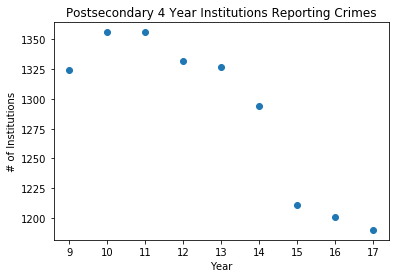

In [33]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Reporting Crimes')
ax.scatter(year_list, institutions)
ax.set_ylabel('# of Institutions')
ax.set_xlabel('Year')
plt.show()

In [25]:
# find all columns regarding rape
rape_cols = [col for col in important.columns if 'RAPE' in col]
rape_cols

['RAPE', 'RAPE_RAC', 'RAPE_SEX', 'RAPE_GEN', 'RAPE_GID']

In [12]:
important[rape_cols].loc[important['YEAR'] == year].sum()

RAPE        8222
RAPE_RAC       0
RAPE_SEX       0
RAPE_GEN       0
RAPE_GID       0
dtype: int64

In [13]:
# find all colleges that reported crimes in respective categories
year_list = list()
institutions = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    institutions.append(important[rape_cols].loc[important['YEAR'] == year].sum().sum())
    
print(year_list)
print(institutions)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[0, 0, 0, 0, 0, 6011, 6563, 7552, 8222]


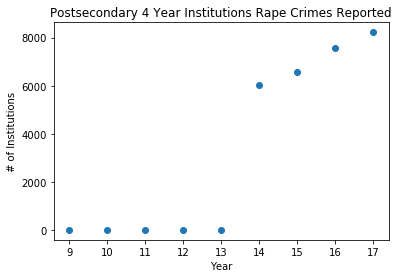

In [14]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Rape Crimes Reported')
ax.scatter(year_list, institutions)
ax.set_ylabel('# of Institutions')
ax.set_xlabel('Year')
plt.show()

In [15]:
# find all colleges that reported crimes in respective categories
year_list = list()
institutions = list()
for year in important['YEAR'].unique():
    year_list.append(year)
    institutions.append(important['LIQUOR'].loc[important['YEAR'] == year].sum())
    
print(year_list)
print(institutions)

[9, 10, 11, 12, 13, 14, 15, 16, 17]
[1803, 315582, 333438, 321574, 301505, 294336, 272184, 253660, 221580]


In [27]:
important['LIQUOR'].loc[important['YEAR'] == 9].sum()

1803

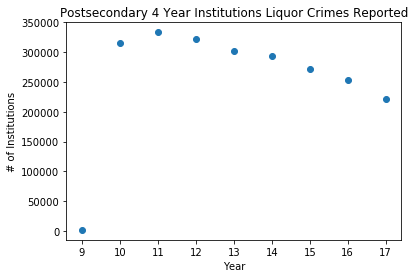

In [26]:
# graph institution number from above filters
ax = plt.subplot()
ax.set_title('Postsecondary 4 Year Institutions Liquor Crimes Reported')
ax.scatter(year_list, institutions)
ax.set_ylabel('# of Institutions')
ax.set_xlabel('Year')
plt.show()